In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

In [7]:
data.age.value_counts()
pd.crosstab(data.target, data.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,...,4,3,6,2,1,3,0,0,0,1
1,1,2,2,2,2,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0


In [8]:
pd.crosstab(x.sex,y)

target,0,1
sex,,
0,24,72
1,114,93


Text(0, 0.5, 'Amount')

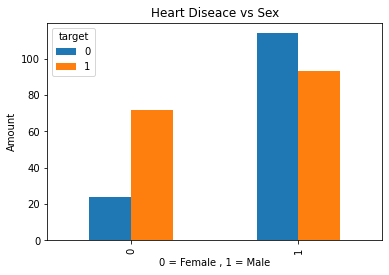

In [9]:
pd.crosstab(x.sex,y).plot.bar()
# plt.bar(x.sex,y) .... wrong method to plot for such a graph 
plt.title('Heart Diseace vs Sex')
plt.xlabel('0 = Female , 1 = Male')
plt.ylabel('Amount')

In [10]:
pd.crosstab(x.fbs,y)

target,0,1
fbs,,
0,116,142
1,22,23


<AxesSubplot:xlabel='fbs'>

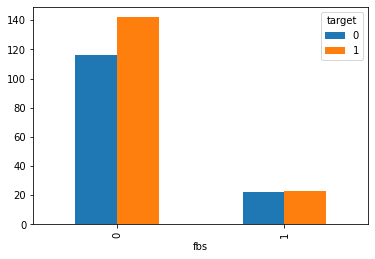

In [11]:
pd.crosstab(x.fbs,y).plot(kind='bar')

<AxesSubplot:xlabel='restecg'>

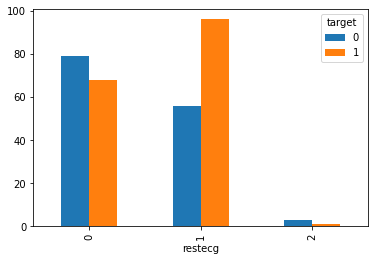

In [12]:
pd.crosstab(x.restecg,y).plot(kind='bar')

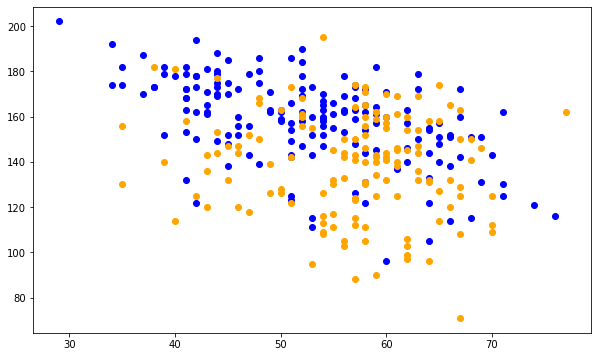

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x.age[y==1],
          x.thalach[y==1],c ='blue')
plt.scatter(x.age[y==0],
            x.thalach[y==0],c='orange')

<AxesSubplot:ylabel='Frequency'>

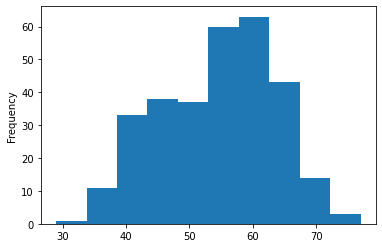

In [14]:
data.age.value_counts
# data.age.plot(kind='hist')
# or use 
data.age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

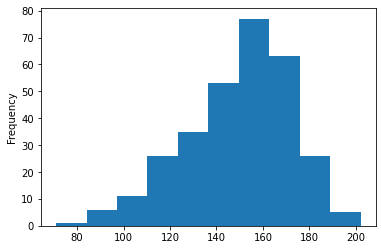

In [15]:
data.thalach.plot.hist()

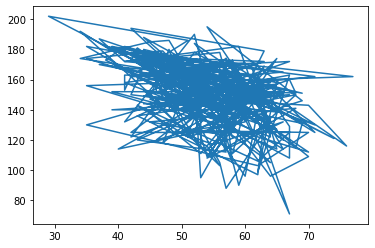

In [16]:
plt.plot(x.age,x.thalach)
plt.show()

In [17]:
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [18]:
pd.crosstab(x.cp,y)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot:xlabel='cp'>

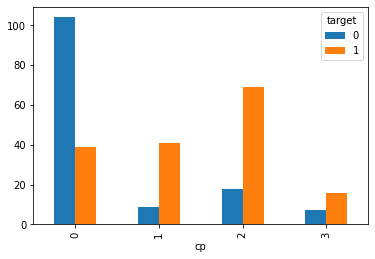

In [19]:
pd.crosstab(x.cp,y).plot(kind='bar')

In [20]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


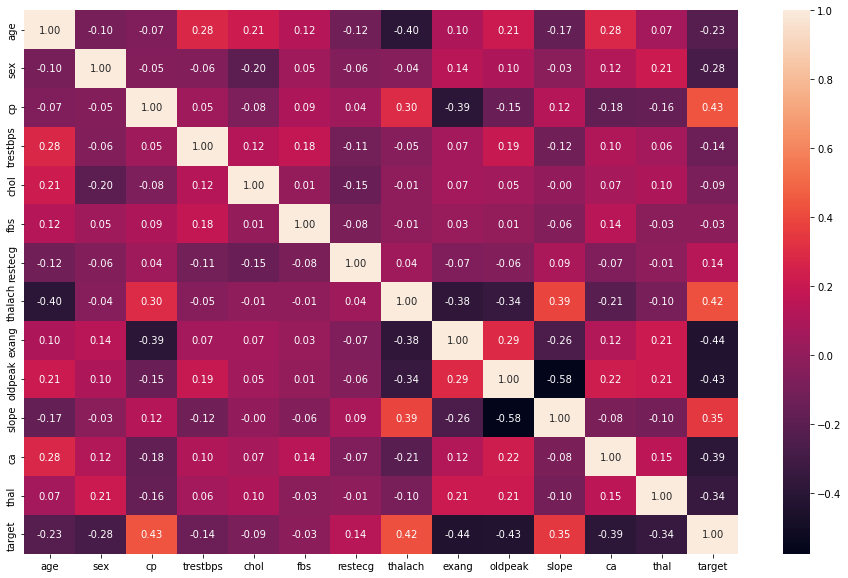

In [21]:
# corr_matrix = data.corr()
plt.figure(figsize=(16,10))
mefn=sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [23]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,train_size=0.8)

In [24]:
x_test,x_train,y_test,y_train

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 247   66    1   1       160   246    0        1      120      1      0.0   
 270   46    1   0       120   249    0        0      144      0      0.8   
 23    61    1   2       150   243    1        1      137      1      1.0   
 291   58    1   0       114   318    0        2      140      0      4.4   
 302   57    0   1       130   236    0        0      174      0      0.0   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 143   67    0   0       106   223    0        1      142      0      0.3   
 283   40    1   0       152   223    0        1      181      0      0.0   
 158   58    1   1       125   220    0        1      144      0      0.4   
 119   46    0   0       138   243    0        0      152      1      0.0   
 157   35    1   1       122   192    0        1      174      0      0.0   
 
      slope  ca  thal  
 247      1   3     1  
 270      2   0     3  
 2

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Gargi Tyagi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm1 = confusion_matrix(y_pred_lr,y_test)
cm1

array([[ 83,  14],
       [ 29, 116]], dtype=int64)

In [28]:
lr_a_score = accuracy_score(y_pred_lr,y_test)
lr_a_score
# lr.score(x_test,y_test)

0.8223140495867769

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred_knn = knn.predict(x_test)
y_pred_knn
# knn.score(x_test,y_test)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [31]:
cm2 = confusion_matrix(y_pred_knn,y_test)
cm2

array([[50, 35],
       [62, 95]], dtype=int64)

In [32]:
# knn_a_score = accuracy_score(y_pred_knn,y_test)
# knn_a_score
knn.score(x_test,y_test)

0.5991735537190083

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [35]:
cm3 = confusion_matrix(y_pred_rfc,y_test)
cm3

array([[ 81,  17],
       [ 31, 113]], dtype=int64)

In [36]:
rfc_a_score = accuracy_score(y_pred_rfc,y_test)
rfc_a_score

0.8016528925619835

In [37]:
# Training KNN
test_scores = []
neighbors = range(1,21)
for i in neighbors:
  knn.set_params(n_neighbors = i)
  knn.fit(x_train,y_train)
  y_pred_knn = knn.predict(x_test)
  test_scores.append(accuracy_score(y_test,y_pred_knn))

In [38]:
test_scores

[0.5867768595041323,
 0.5826446280991735,
 0.5991735537190083,
 0.5909090909090909,
 0.5991735537190083,
 0.6157024793388429,
 0.6115702479338843,
 0.6239669421487604,
 0.6198347107438017,
 0.628099173553719,
 0.6322314049586777,
 0.6363636363636364,
 0.6239669421487604,
 0.6157024793388429,
 0.6033057851239669,
 0.5950413223140496,
 0.5867768595041323,
 0.5867768595041323,
 0.5743801652892562,
 0.5826446280991735]

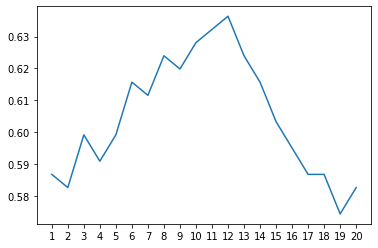

In [39]:
plt.plot(neighbors,test_scores)
plt.xticks(np.arange(1, 21, 1))
plt.show()

In [40]:
# creating hyperparameter grid for logistic regression 

log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}
# hyperparameter grid for Randomforest

rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fitting the hyperparameter for Logistic regression

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [43]:
rs_log_reg.score(x_test,y_test)

0.8181818181818182

In [62]:
# from sklearn.model_selection import RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           verbose=True,
                           n_iter=20)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [61]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [46]:
rs_rf.score(x_test,y_test)

0.8099173553719008

In [47]:
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [49]:
gs_log_reg.score(x_test,y_test)

0.8140495867768595

In [50]:
# Roc curve and AUC score
# Confusion matrix
# Claassification report
# Precision
# Recall
# F1-score
# Using cross validation wherever possible

In [51]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

C:\Users\Gargi Tyagi\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


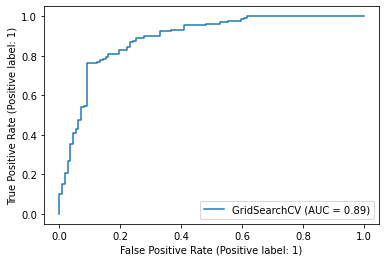

In [52]:
# plot roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test,y_test)

In [53]:
cm = confusion_matrix(y_test,y_preds)
print(cm)

[[ 81  31]
 [ 14 116]]


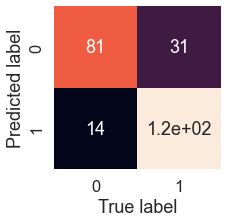

In [54]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [57]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       112
           1       0.79      0.89      0.84       130

    accuracy                           0.81       242
   macro avg       0.82      0.81      0.81       242
weighted avg       0.82      0.81      0.81       242



In [56]:
# using cross validation for certain features:

In [58]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [63]:
clf = LogisticRegression(C= 0.38566204211634725, solver='liblinear')

In [64]:
# Cross-validated accuracy, precision, recall, F1_score
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_accuracy

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [65]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8380874316939891

In [66]:
from sklearn.model_selection import cross_val_score
cv_precision = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precision

array([0.775     , 0.88235294, 0.85714286, 0.83783784, 0.725     ])

In [67]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8154667272314331

In [68]:
from sklearn.model_selection import cross_val_score
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall

array([0.93939394, 0.90909091, 0.90909091, 0.93939394, 0.87878788])

In [69]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [70]:
from sklearn.model_selection import cross_val_score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1

array([0.84931507, 0.89552239, 0.88235294, 0.88571429, 0.79452055])

In [71]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8614850462777628

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

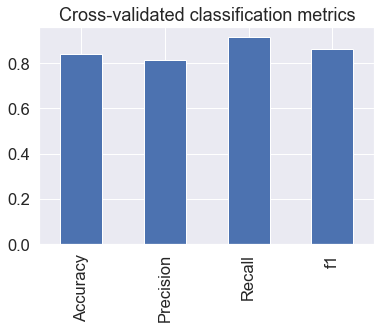

In [72]:
# Visualizing coss-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'f1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False)


In [ ]:
Let's find the feature importance for our LogisticRegression model

In [73]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);
clf.coef_

array([[-0.02383744, -0.53118374,  0.5504588 , -0.01655738,  0.01035331,
         0.05829707,  0.17076941,  0.01637993, -0.2631045 , -0.6262739 ,
         0.24290003, -0.50449736, -0.32344687]])

In [74]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.023837440833464514,
 'sex': -0.5311837433868399,
 'cp': 0.5504588020981843,
 'trestbps': -0.01655738124180738,
 'chol': 0.010353309860123968,
 'fbs': 0.058297066361357626,
 'restecg': 0.1707694071885176,
 'thalach': 0.016379933352247838,
 'exang': -0.2631044980986131,
 'oldpeak': -0.626273901661515,
 'slope': 0.2429000269677409,
 'ca': -0.504497357394187,
 'thal': -0.3234468693267167}

<AxesSubplot:title={'center':'Feature Importance'}>

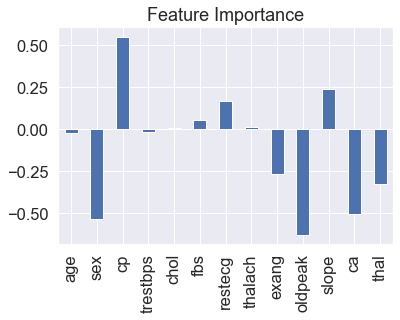

In [76]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)